## Final Project Alternative 1: Linear Regression ##

**Student Name:** Ravkeerat Singh 

**Student ID:** 101344680

---

**Student Name:** Josiah Galloway 

**Student ID:** 101296257

---

**Student Name:** Umit Kilinc

**Student ID:** 101232721

In [149]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [150]:
#importing the file
DF = pd.read_csv('/content/Crime.csv')
DF.head()

,X1,X2,X3,X4,X5,X6,X7
0,478,184,40,74,11,31,20
1,494,213,32,72,11,43,18
2,643,347,57,70,18,16,16
3,341,565,31,71,11,25,19
4,773,327,67,72,9,29,24


In [151]:
# Q3 printing the shape
print('Shape :', DF.shape)

Shape : (50, 7)


In [152]:
#printing about the table
DF.describe()

,X1,X2,X3,X4,X5,X6,X7
count,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,717.960000,616.180000,37.760000,58.800000,15.400000,29.900000,13.820000
std,293.938766,573.739175,13.820364,9.965246,6.023762,14.801062,5.157479
min,341.000000,29.000000,16.000000,42.000000,4.000000,7.000000,8.000000
25%,497.000000,230.750000,30.000000,49.000000,11.000000,21.250000,11.000000
50%,654.500000,454.000000,34.500000,59.000000,14.000000,25.000000,12.000000
75%,820.500000,822.500000,42.250000,67.000000,19.000000,34.250000,15.750000
max,1740.000000,3545.000000,86.000000,81.000000,34.000000,81.000000,36.000000


In [153]:
#checking Nan values in python
DF.isnull().values.any()

False

In [154]:
# Renaming columns
DF_columns = ["City1", "City2", "City3", "City4", "City5", "City6", "City7"]
DF = pd.read_csv("/content/Crime.csv", names = DF_columns, skiprows=1)
DF.head()

,City1,City2,City3,City4,City5,City6,City7
0,478,184,40,74,11,31,20
1,494,213,32,72,11,43,18
2,643,347,57,70,18,16,16
3,341,565,31,71,11,25,19
4,773,327,67,72,9,29,24


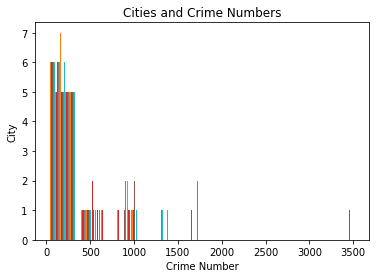

In [155]:
#Matplotlib 1. chart
import matplotlib.pyplot as plt
import seaborn; 

plt.hist(DF)
plt.title("Cities and Crime Numbers")
plt.xlabel('Crime Number')
plt.ylabel('City');

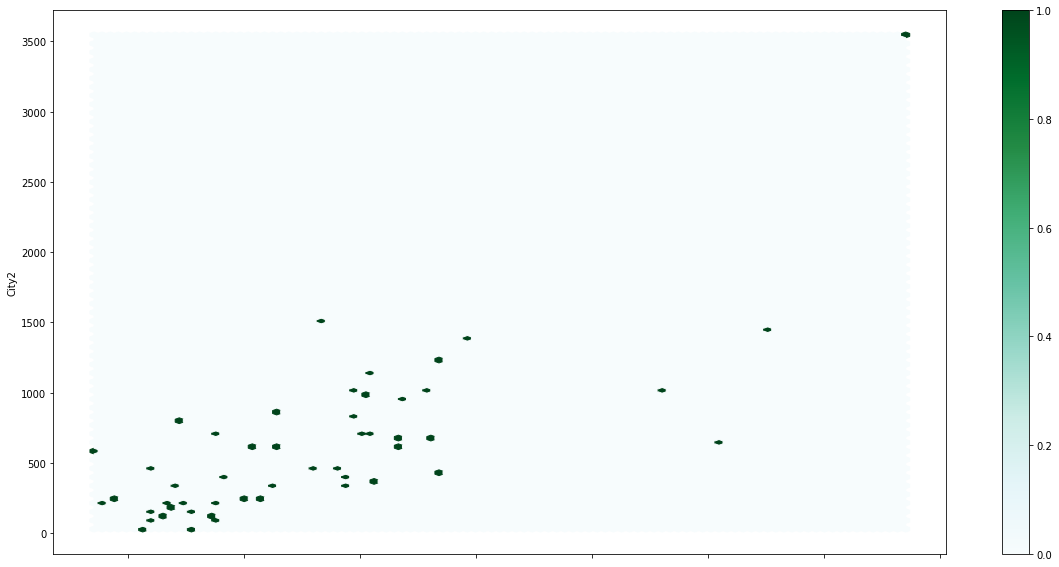

In [156]:
#Matplotlib 2. chart - hexbin plot
DF.plot(figsize=(20,10), kind='hexbin',x=0, y=1) # hexbin plot

In [157]:
# Separating the target and features
X = DF["City4"].values.reshape(-1, 1)
y = DF["City7"].values.reshape(-1, 1)

In [158]:
# Splitting the data into 70% training and 30% training. 
# Setting the randomness involved in the model to 42

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state=42)
X_train

array([[68],
       [47],
       [49],
       [57],
       [64],
       [66],
       [64],
       [57],
       [48],
       [57],
       [74],
       [69],
       [52],
       [50],
       [68],
       [43],
       [81],
       [72],
       [72],
       [54],
       [70],
       [48],
       [49],
       [45],
       [62],
       [60],
       [54],
       [59],
       [67],
       [46],
       [62],
       [45],
       [65],
       [44],
       [49]])

In [159]:
# Training the Linear Regression Model
reg = LinearRegression()

# Fitting the line to our data
reg.fit(X_train, y_train)
print(reg.intercept_)

[-8.21755737]


In [160]:
# Slope
print(reg.coef_)

[[0.36947202]]


In [161]:
# Predicting the crime
score = reg.predict([[-8.21]])
score

array([[-11.25092267]])

In [162]:
# Comparing the actual data and the predicted data
y_pred = reg.predict(X_test)

DF_pred = pd.DataFrame({"Actual": y_test.squeeze(), "Predicted": y_pred.squeeze()})
DF_pred

,Actual,Predicted
0,16,16.537068
1,12,11.733932
2,10,9.517100
3,11,7.300268
4,27,14.689708
5,16,18.384428
6,12,14.320236
7,18,12.842348
8,9,9.147628
9,15,12.472876


In [163]:
#Evaluating the model with Mean Squared Error

from sklearn.metrics import mean_squared_error
import numpy as np

# Checking how close the regression line is to the set of points
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")

Mean Squared Error: 19.20
